# Credit Card Fraud Detection Machine Learning

The data was downloaded from Kaggle:https://www.kaggle.com/mlg-ulb/creditcardfraud

The dataset contains transactions made by European credit cardholders credit cards in September 2013. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numeric input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, the original features and more background information about the data are unavailable. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependent cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.

## Goal

The objective is to classify the data transactions as either legitimate (class 0) or fradulent (class 1) using a machine learning model. Three machine learning models will be trained and tested to determine which will yield the best results:

- Decision Trees
- Random Forest
- K Means Clustering

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [37]:
# Importing the dataset from Google Drive
from google.colab import drive
drive.mount('/content/drive')

dataset = pd.read_csv('drive/My Drive/Credit-Card-Fraud-Detection-Machine-Learning-Project/creditcard.csv')
dataset.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [38]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# Checking for Missing Values

In [39]:
# Checking the entire data frame for missing values
dataset.isnull().sum().max()

0

# Exploratory Data Analysis

In this stage, we will examine the data to identify any patterns, trends and relationships between the variables. It will help us analyze the data and extract insights that can be used to make decisions.

Data Visualization will give us a clear idea of what the data means by giving it visual context.

## Class

In [40]:
#Creating a correlation dataframe 
cc = dataset.corr() 

#Identifying the correlation of the other variables to Class
cc["Class"].sort_values()

V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V6       -0.043643
Time     -0.012323
V24      -0.007221
V13      -0.004570
V15      -0.004223
V23      -0.002685
V22       0.000805
V25       0.003308
V26       0.004455
Amount    0.005632
V28       0.009536
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V2        0.091289
V4        0.133447
V11       0.154876
Class     1.000000
Name: Class, dtype: float64

V17 and V14 have a low negative correlation with Class while all the other variables have a negligible correlation with class.

Note: Typically, a correlation value between 0.3-0.5 (either positive or negative) is considered to be a low correlation and anything below that is negligible.

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

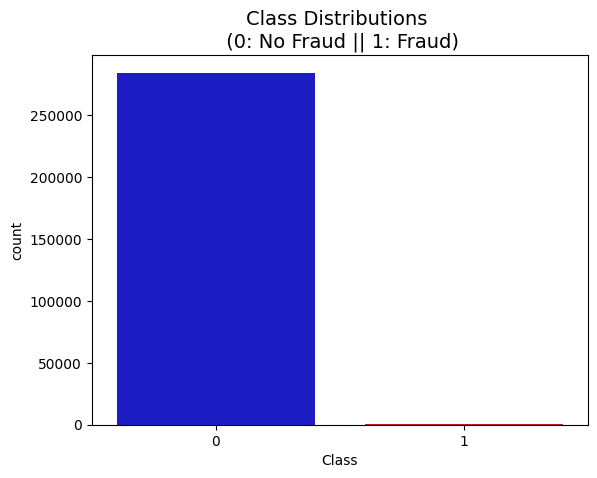

In [41]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=dataset, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

**Distributions**: By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.



## Amount

### Fraudulent Transaction Amount

In [42]:
#Creating a dataframe with all the fraud transactions
fraud_cards = dataset[dataset['Class']==1]

fraud_cards['Amount'].describe().round(2)

count     492.00
mean      122.21
std       256.68
min         0.00
25%         1.00
50%         9.25
75%       105.89
max      2125.87
Name: Amount, dtype: float64

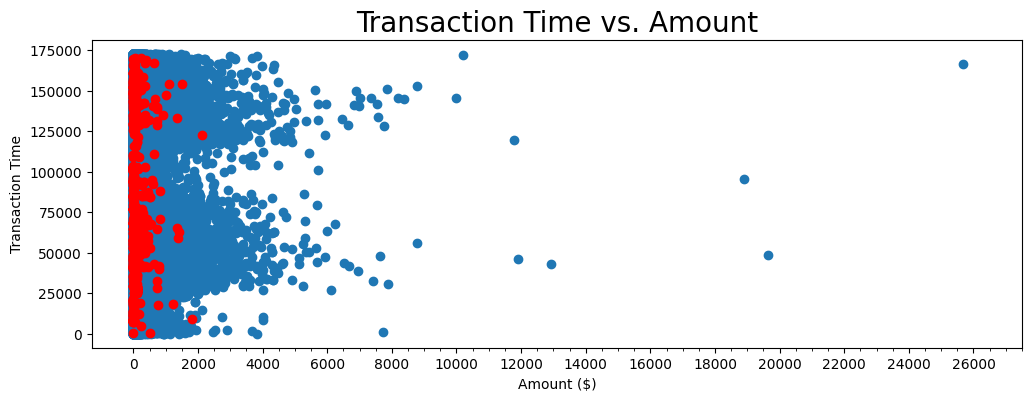

In [44]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.scatter(dataset['Amount'], dataset['Time'])
ax.scatter(fraud_cards['Amount'], fraud_cards['Time'], facecolor="red")

major_xticks = np.arange(0, 28000, 2000)
minor_xticks = np.arange(0, 28000, 500)

ax.set_xticks(major_xticks)
ax.set_xticks(minor_xticks, minor=True)
ax.set_xlabel("Amount ($)")
ax.set_ylabel("Transaction Time")
ax.set_title('Transaction Time vs. Amount', fontsize=20)

plt.show()

**Fraud Amount:** Key Takeaways

- The average fraud amount is <b>\$122.21</b>
- The standard deviation is <b>\$256.68</b>, which is quite large which indicates that the fraud amount can vary significantly.
- The majority of fraudulent transactions are between <b>zero and \$50</b>
- There frauds occur at various times but overall the majority of fraudulent transactions appear to be <b>under \$1000.</b> 

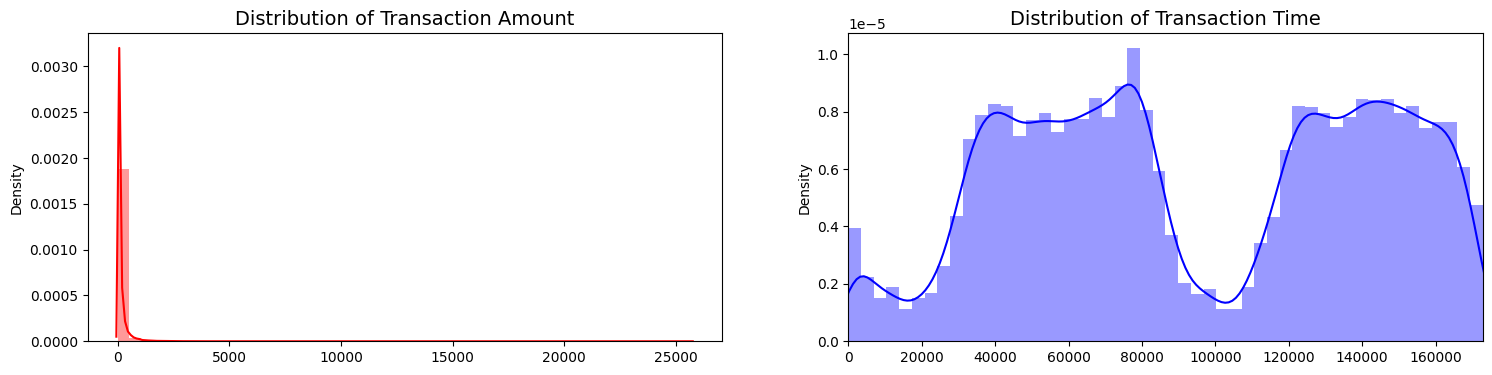

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = dataset['Amount'].values
time_val = dataset['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()


<h2> Scaling and Distributing </h2>
<a id="distributing"></a>
In this phase of our kernel, we will first scale the columns comprise of <b>Time</b> and <b>Amount </b>. Time and amount should be scaled as the other columns. On the other hand, we need to also create a sub sample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases, helping our algorithms better understand patterns that determines whether a transaction is a fraud or not.

<h3> What is a sub-Sample?</h3>
In this scenario, our subsample will be a dataframe with a 50/50 ratio of fraud and non-fraud transactions. Meaning our sub-sample will have the same amount of fraud and non fraud transactions.

<h3> Why do we create a sub-Sample?</h3>
In the beginning of this notebook we saw that the original dataframe was heavily imbalanced! Using the original dataframe  will cause the following issues:
<ul>
<li><b>Overfitting: </b>Our classification models will assume that in most cases there are no frauds! What we want for our model is to be certain when a fraud occurs. </li>
<li><b>Wrong Correlations:</b> Although we don't know what the "V" features stand for, it will be useful to understand how each of this features influence the result (Fraud or No Fraud) by having an imbalance dataframe we are not able to see the true correlations between the class and features. </li>
</ul>

<h3>Summary: </h3> 
<ul>
<li> <b>Scaled amount </b> and <b> scaled time </b> are the columns with scaled values. </li>
<li> There are <b>492 cases </b> of fraud in our dataset so we can randomly get 492 cases of non-fraud to create our new sub dataframe. </li>
<li>We concat the 492 cases of fraud and non fraud, <b>creating a new sub-sample. </b></li>
</ul>

In [10]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

dataset['scaled_amount'] = rob_scaler.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset['scaled_time'] = rob_scaler.fit_transform(dataset['Time'].values.reshape(-1,1))

dataset.drop(['Time','Amount'], axis=1, inplace=True)

dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [11]:
scaled_amount = dataset['scaled_amount']
scaled_time = dataset['scaled_time']

dataset.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
dataset.insert(0, 'scaled_amount', scaled_amount)
dataset.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

dataset.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0




# Train and Test the Model

In this stage we will separate our dataset into training data that will be used to train the model and testing data that will be used to judge the accuracy of the results. We will now train and test the four machine learning models to determine which will yield the best results:

- Decision Trees
- Random Forest
- K Nearest Neighbours
- K Means Clustering

In [12]:
#Calculating the number of frauds/legitimate transactions in the dataset
dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [13]:
#Calculating the percentage of frauds/legitimate transactions in the dataset
round((dataset['Class'].value_counts()/len(dataset))*100, 2)

0    99.83
1     0.17
Name: Class, dtype: float64

As seen above, only about 0.17% of the data is associated with fraudulent transactions. In order to train and test machine learning models, we need a balanced dataset. Therefore, we will create a balanced dataset from a subset of the data and train and test our model on that data. 

## Creating a Balanced Dataset

We have 492 fraudulent transactions. We will choose 250 transactions at random from these transactions and 250 transactions from the at random from the legitimate transactions to create a data set with 500 transactions. 

In [14]:
#Creating a new balanced datset with 250 fraudulent transactions
cards_bal = dataset[dataset['Class']==1].sample(n=250)

#Adding 250 legitimate transactions
cards_bal = cards_bal.append(dataset[dataset['Class']==0].sample(n=250))

In [15]:
#Calculating the percentage of frauds/legitimate transactions in the dataset
round((cards_bal['Class'].value_counts()/len(cards_bal))*100,2)

1    50.0
0    50.0
Name: Class, dtype: float64

Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


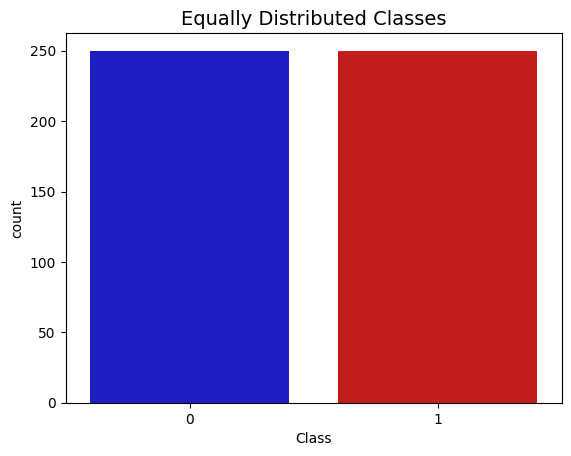

In [16]:
print('Distribution of the Classes in the subsample dataset')
print(cards_bal['Class'].value_counts()/len(cards_bal))

sns.countplot(x='Class', data=cards_bal, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

<h3> Correlation Matrices </h3>
Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific transaction is a fraud. However, it is important that we use the correct dataframe (subsample)  in order for us to see which features have a high positive or negative correlation with regards to fraud transactions.

### Summary and Explanation: 
<ul>
<li><b>Negative Correlations: </b>V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.  </li>
<li> <b> Positive Correlations: </b> V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction. </li>
<li> <b>BoxPlots: </b>  We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions. </li>
</ul>


**Note: ** We have to make sure we use the subsample in our correlation matrix or else our correlation matrix will be affected by the high imbalance between our classes. This occurs due to the high class imbalance in the original dataframe.

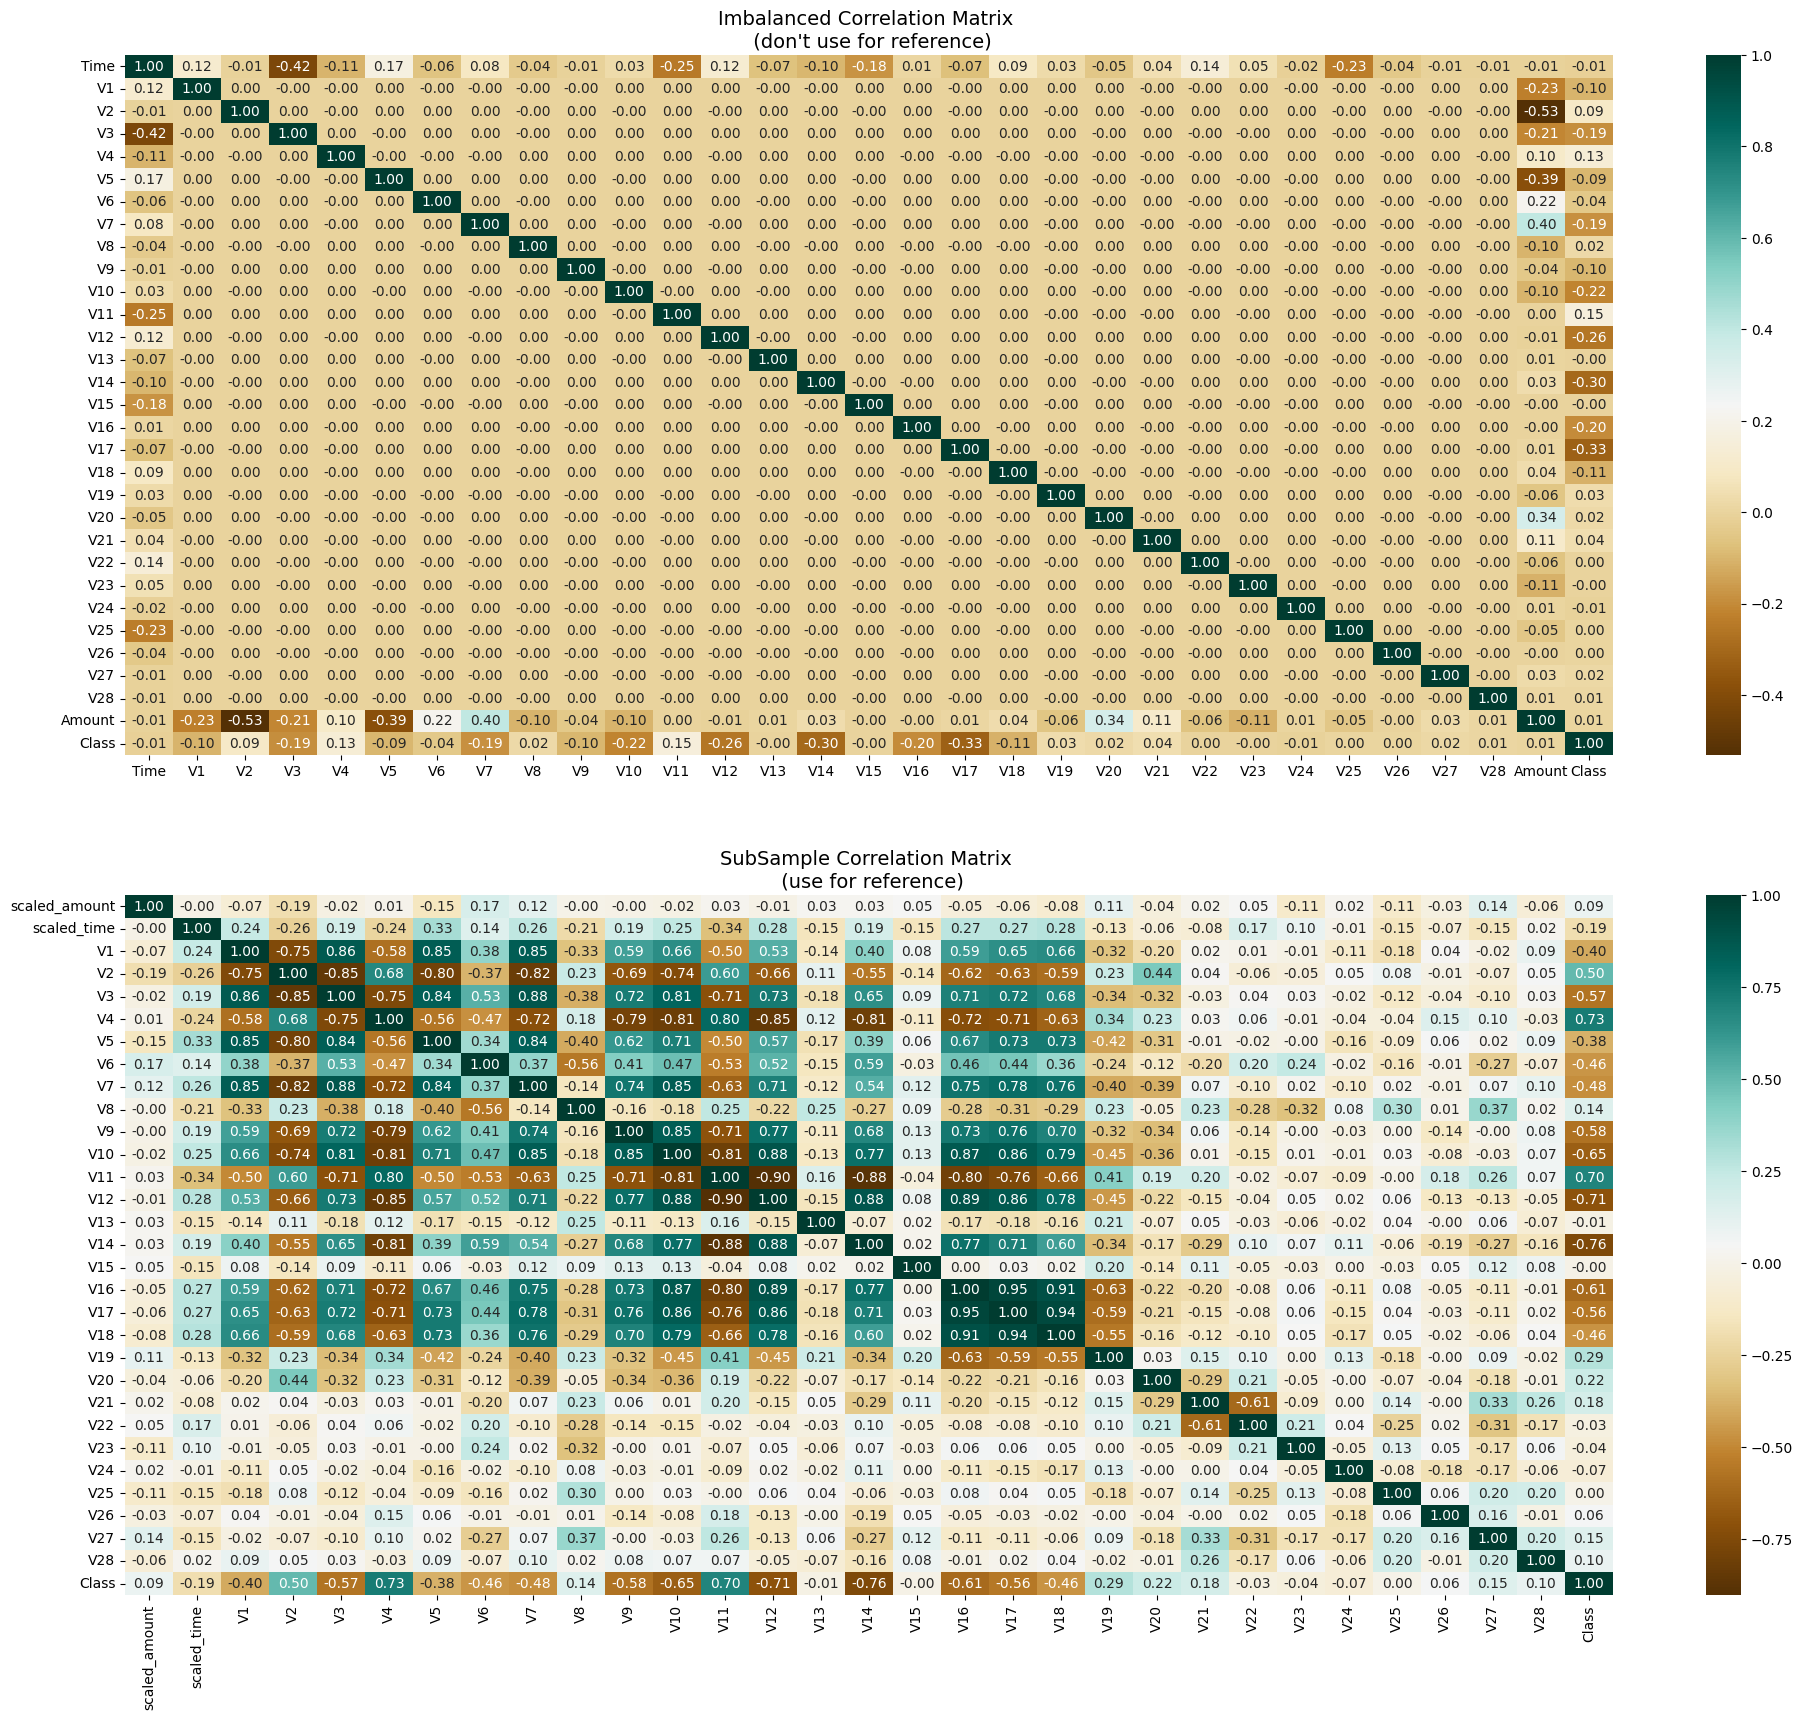

In [17]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))


sns.heatmap(cc, cmap='BrBG', annot=True, fmt=".2f", ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = cards_bal.corr()
sns.heatmap(sub_sample_corr, cmap='BrBG', annot=True, fmt=".2f", ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

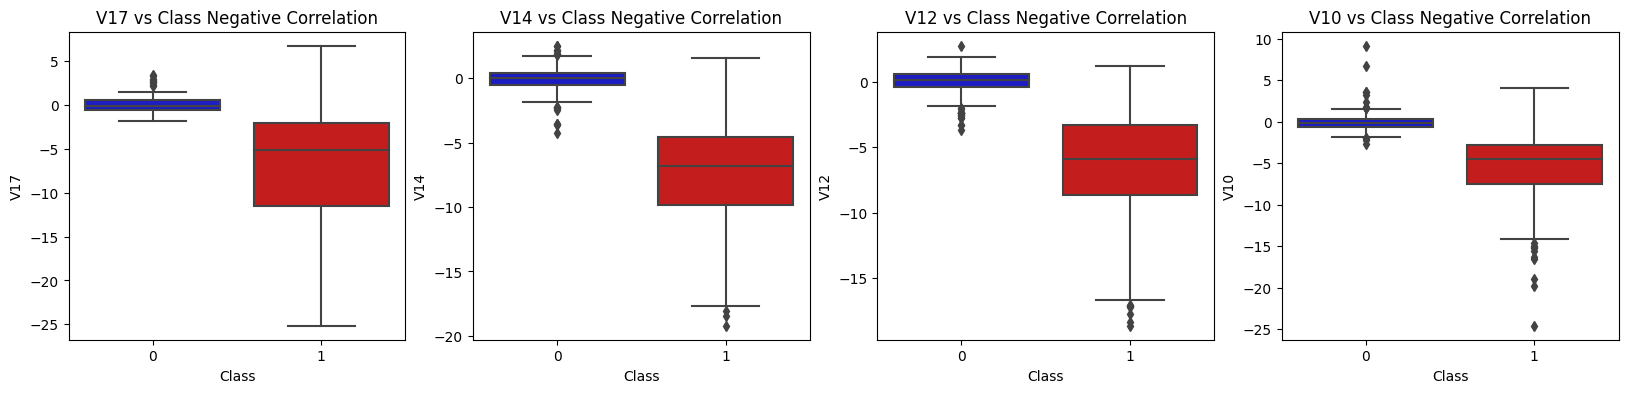

In [18]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=cards_bal, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=cards_bal, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=cards_bal, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=cards_bal, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

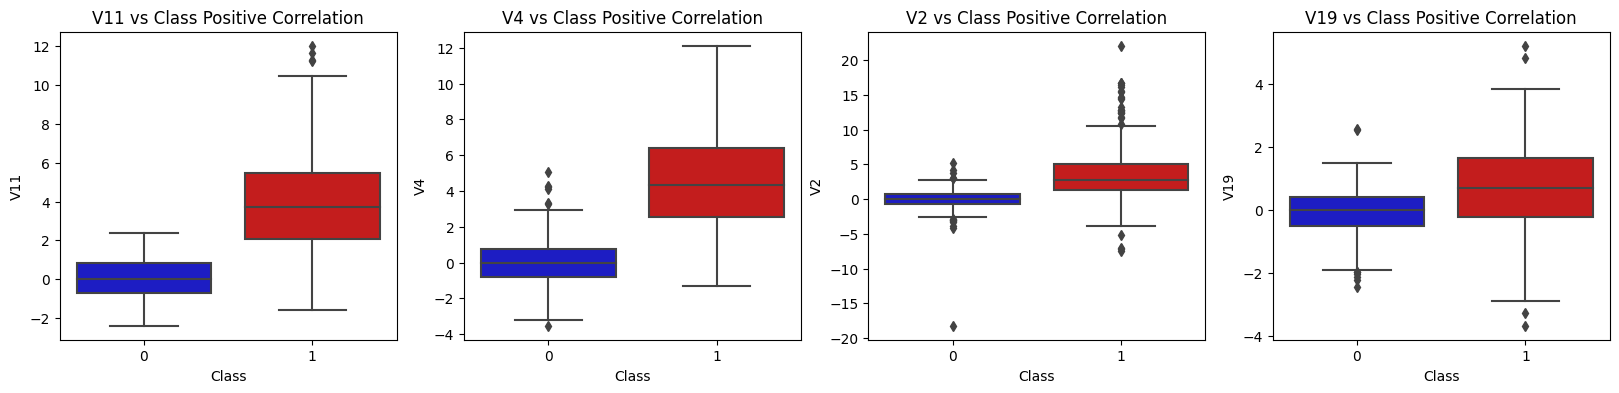

In [19]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=cards_bal, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=cards_bal, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=cards_bal, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=cards_bal, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

## Anomaly Detection:
<a id="anomaly"></a>



Our main aim in this section is to remove "extreme outliers" from features that have a high correlation with our classes. This will have a positive impact on the accuracy of our models.  <br><br>


### Interquartile Range Method:
<ul>
<li> <b>Interquartile Range (IQR): </b> We calculate this by the difference between the 75th percentile and 25th percentile. Our aim is to create a threshold beyond the 75th and 25th percentile that in case some instance pass this threshold the instance will be deleted.  </li>
<li> <b>Boxplots: </b> Besides easily seeing the 25th and 75th percentiles (both end of the squares) it is also easy to see extreme outliers (points beyond the lower and higher extreme). </li>
</ul>

### Outlier Removal Tradeoff:
We have to be careful as to how far do we want the threshold for removing outliers. We determine the threshold by multiplying a number (ex: 1.5) by the (Interquartile Range). The higher this threshold is, the less outliers will detect (multiplying by a higher number ex: 3), and the lower this threshold is the more outliers it will detect.  <br><br>

**The Tradeoff: **
The lower the threshold the more outliers it will remove however, we want to focus more on "extreme outliers" rather than just outliers. Why? because we might run the risk of information loss which will cause our models to have a lower accuracy. You can play with this threshold and see how it affects the accuracy of our classification models.


### Summary:
<ul>
<li> <b> Visualize Distributions: </b> We first start by visualizing the distribution of the feature we are going to use to eliminate some of the outliers. V14 is the only feature that has a Gaussian distribution compared to features V12 and V10. </li>
<li><b>Determining the threshold: </b> After we decide which number we will use to multiply with the iqr (the lower more outliers removed), we will proceed in determining the upper and lower thresholds by substrating q25 - threshold (lower extreme threshold) and adding q75 + threshold (upper extreme threshold). </li>
<li> <b>Conditional Dropping: </b> Lastly, we create a conditional dropping stating that if the "threshold" is exceeded in both extremes, the instances will be removed. </li>
<li> <b> Boxplot Representation: </b> Visualize through the boxplot that the number of "extreme outliers" have been reduced to a considerable amount. </li>
</ul>

**Note:** After implementing outlier reduction our accuracy has been improved by over 3%! Some outliers can distort the accuracy of our models but remember, we have to avoid an extreme amount of information loss or else our model runs the risk of underfitting.


**Reference**: More information on Interquartile Range Method: <a src="https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/"> How to Use Statistics to Identify Outliers in Data </a> by Jason Brownless (Machine Learning Mastery blog)

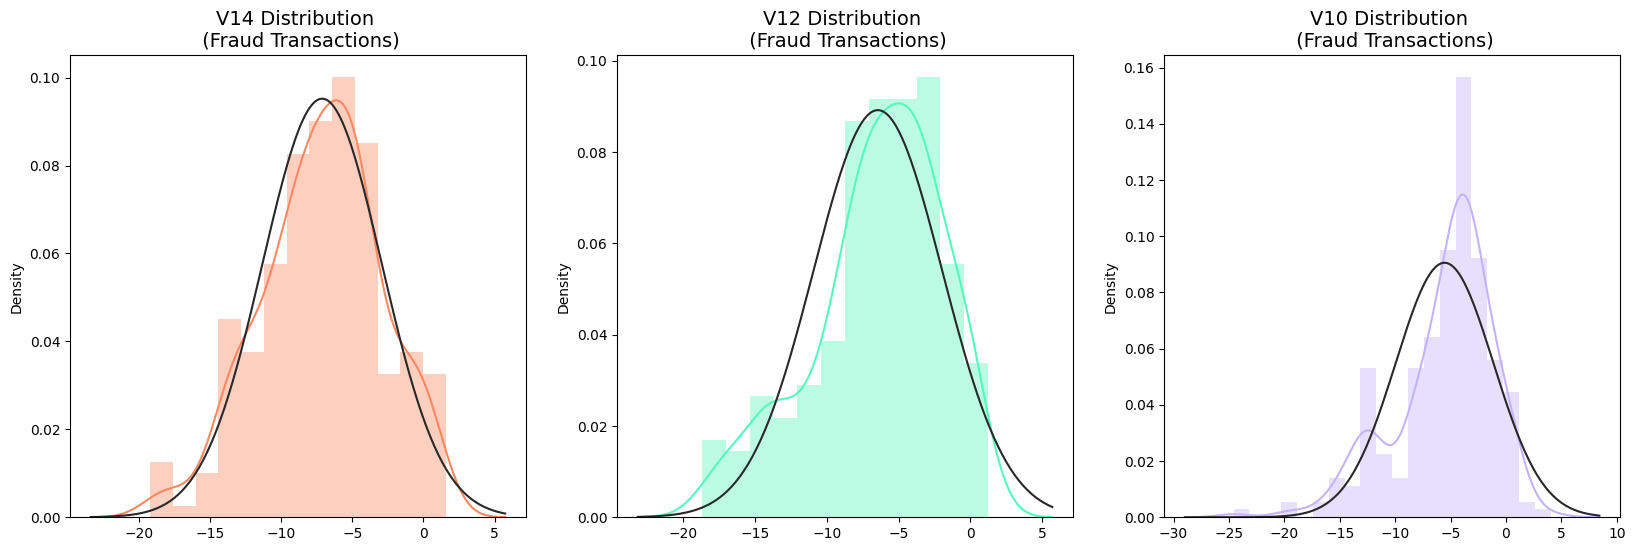

In [20]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = cards_bal['V14'].loc[cards_bal['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = cards_bal['V12'].loc[cards_bal['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = cards_bal['V10'].loc[cards_bal['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

<b>This an Example Explain How To Find Outliers in Statistics</b>:👇

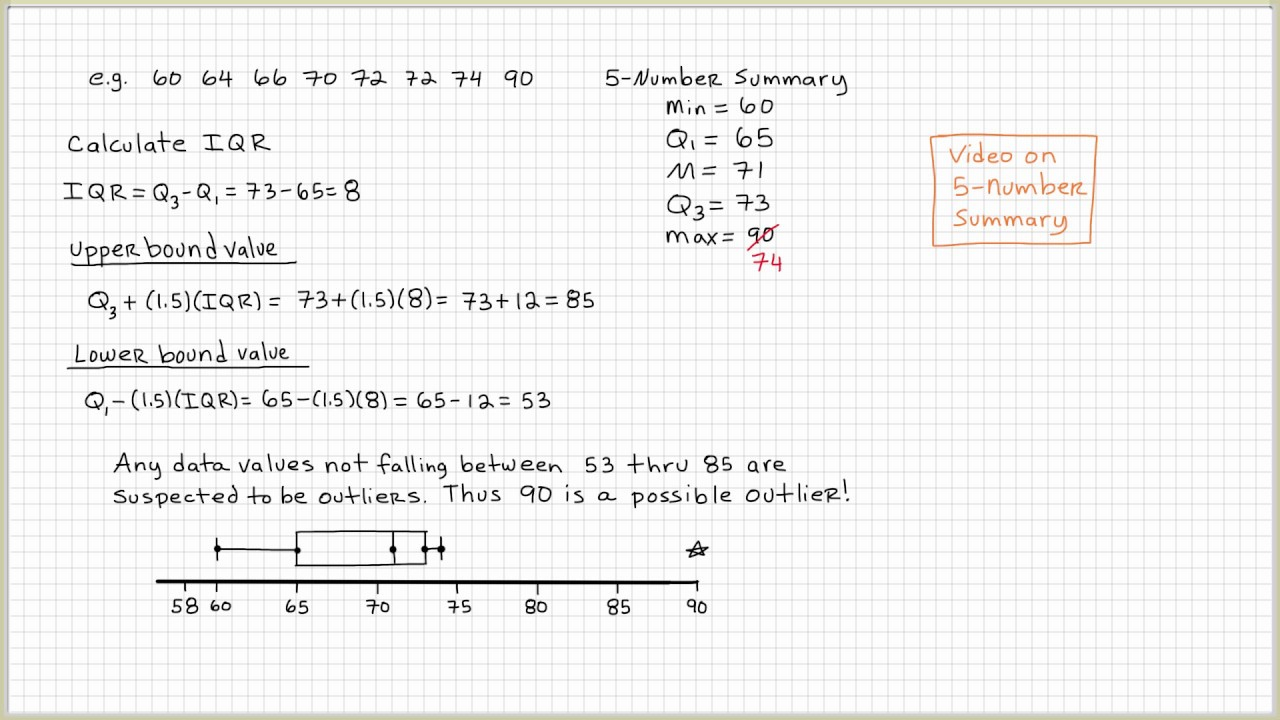

In [21]:
# -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = cards_bal['V14'].loc[cards_bal['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V14 outliers:{}'.format(outliers))

cards_bal = cards_bal.drop(cards_bal[(cards_bal['V14'] > v14_upper) | (cards_bal['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = cards_bal['V12'].loc[cards_bal['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
cards_bal = cards_bal.drop(cards_bal[(cards_bal['V12'] > v12_upper) | (cards_bal['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(cards_bal)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = cards_bal['V10'].loc[cards_bal['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
cards_bal = cards_bal.drop(cards_bal[(cards_bal['V10'] > v10_upper) | (cards_bal['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(cards_bal)))

Quartile 25: -9.821261191288045 | Quartile 75: -4.551084244666095
iqr: 5.27017694662195
Cut Off: 7.905265419932925
V14 Lower: -17.72652661122097
V14 Upper: 3.35418117526683
Feature V14 Outliers for Fraud Cases: 3
V14 outliers:[-19.2143254902614, -18.4937733551053, -18.0499976898594]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -16.678727647560674
V12 Upper: 4.856791624491789
V12 outliers: [-18.6837146333443, -17.1829184301947, -17.1504052507291, -18.4311310279993, -16.7283393320915]
Feature V12 Outliers for Fraud Cases: 5
Number of Instances after outliers removal: 492
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -13.628214688276241
V10 Upper: 3.71625377545232
V10 outliers: [-15.2318333653018, -15.5637913

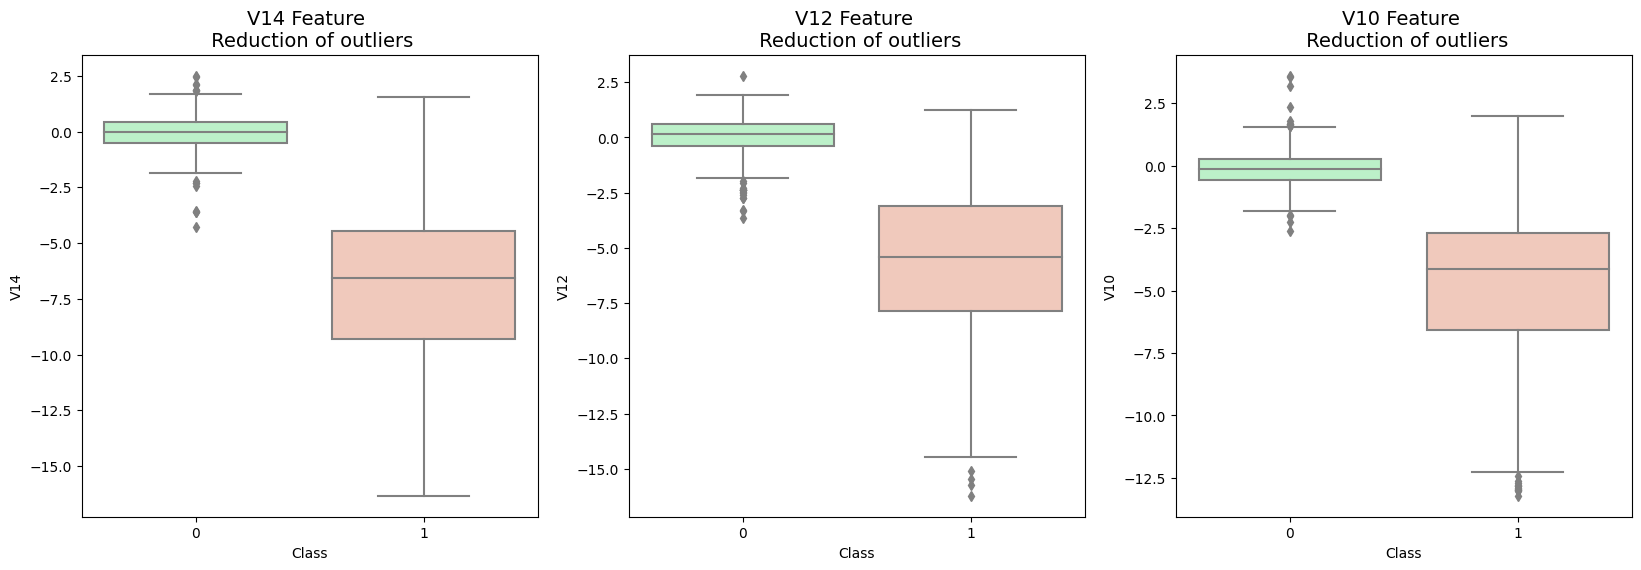

In [22]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=cards_bal,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)


# Feature 12
sns.boxplot(x="Class", y="V12", data=cards_bal, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)


# Feature V10
sns.boxplot(x="Class", y="V10", data=cards_bal, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)


plt.show()


## Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

X = cards_bal.drop('Class',axis=1)
y = cards_bal['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

### Training a Decision Tree Model

In [24]:
#Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

#Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

### Decision Tree: Predictions and Evaluation

In [25]:
decision_trees_predictions = dtree.predict(X_test)

## Random Forests

### Training the Random Forest Model

In [26]:
#Create an instance of the RandomForestClassifier class and fit it to our training data
from sklearn.ensemble import RandomForestClassifier

#n_estimators is the number of trees in the forest
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train,y_train)

RandomForestClassifier()

### Random Forests: Predictions and Evaluation

In [27]:
random_forests_predictions = rfc.predict(X_test)

## K Means Clustering

### Training the K Means Model

In [28]:
#Importing K Means classifier
from sklearn.cluster import KMeans

#Create an instance of the K Means classifier and fit it to our training data
#We only have two target values 1 and 0 so we set the number of clusters to 2
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train,y_train)

KMeans(n_clusters=2)

### K Means: Predictions and Evaluations

In [29]:
kmeans_predictions = kmeans.fit_predict(X_test)

## Comparing Performance

Now that we have trained four different models we can compare their performance to determine which model should be applied to the original dataset.

In [30]:
#Import Classification Report and Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix

#Converting each of the classification reports into dictionaries
report_dt = classification_report(y_test,decision_trees_predictions , output_dict=True)
report_rf = classification_report(y_test,random_forests_predictions , output_dict=True)
report_kmeans = classification_report(y_test,kmeans_predictions, output_dict=True)

In [31]:
model = {'Model Name':['Decision Trees', 'Random Forests','K-Means'],
        'Accuracy':[report_dt['accuracy'], report_rf['accuracy'], report_kmeans['accuracy']],
        'Precision':[report_dt['weighted avg']['precision'],report_rf['weighted avg']['precision'],  report_kmeans['weighted avg']['precision']],
        'Recall':[report_dt['weighted avg']['recall'],report_rf['weighted avg']['recall'], report_kmeans['weighted avg']['recall']],
        'F1-Score':[report_dt['weighted avg']['f1-score'],report_rf['weighted avg']['f1-score'], report_kmeans['weighted avg']['f1-score']]}

model = pd.DataFrame(model)

model.round(2).sort_values(by=['Accuracy','Precision','Recall','F1-Score'],ascending=False)

,Model Name,Accuracy,Precision,Recall,F1-Score
1,Random Forests,0.93,0.93,0.93,0.93
0,Decision Trees,0.91,0.91,0.91,0.91
2,K-Means,0.22,0.14,0.22,0.17


As seen above the <b>Random Forests Model</b> yields the best results so we will test the model against the original data from the original dataset to compare its performance.

In [32]:
X = dataset.drop('Class',axis=1)
y = dataset['Class']

#Random Forests predictions
random_forests_predictions = rfc.predict(X)

#Assigning the classification report to a dictionary to call later
cards_cr = classification_report(y,random_forests_predictions, output_dict=True)

print(classification_report(y,random_forests_predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    284315
           1       0.10      0.92      0.17       492

    accuracy                           0.98    284807
   macro avg       0.55      0.95      0.58    284807
weighted avg       1.00      0.98      0.99    284807



In [33]:
cards_accuracy = round(cards_cr['accuracy'], 2)

print('The Random Forests Model has an accuracy of',cards_accuracy)

The Random Forests Model has an accuracy of 0.98


Overall, the Random Forests Model does the best job of predicting fraudulent credit card transactions.